In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
col = ['sbp_office','dbp_office','meanFull_SBP', 'meanFull_DBP',
            'Age', 'sex_F0M1', 'Totalchol', 'LDL', 'HDL', 'TG', 'Hb', 'Cr', 'eGFR_MDRD',
            'eGFR_CKDEPI', 'height', 'weight', 'BMI', 'EF', 'LVMI', '연구등록번호', 'meanAwake_SBP', 'meanSleep_SBP', 'ABPM_Date']
df_abpm = pd.read_csv("/Users/younyung.gene/ABPM/원본/ABPM.csv", usecols=col)
df_abpm.rename(columns={"연구등록번호" : "AlsUnitNo"}, inplace=True)
df_abpm


,ABPM_Date,sbp_office,dbp_office,meanFull_SBP,meanFull_DBP,meanAwake_SBP,meanSleep_SBP,Age,sex_F0M1,Totalchol,...,Hb,Cr,eGFR_MDRD,eGFR_CKDEPI,height,weight,BMI,EF,LVMI,AlsUnitNo
0,2020-06-03,160.0,94.0,156.3,83.7,160.3,151.3,69.8,0,238.0,...,13.6,0.54,111.7,95.8,148.0,54.0,24.7,58.0,86.0,308635
1,2018-04-24,123.0,83.0,153.0,84.0,155.0,149.0,60.6,0,199.0,...,13.4,0.79,74.1,81.0,153.0,57.0,24.3,NaN,NaN,3891528
2,2016-06-21,129.0,77.0,136.0,84.0,139.0,121.0,47.8,1,239.0,...,14.4,0.78,106.3,106.9,172.0,62.0,21.0,62.0,74.0,4535311
3,2015-04-23,90.0,57.0,124.0,81.0,129.0,113.0,58.6,1,105.0,...,13.5,0.81,97.7,97.6,162.0,63.0,24.0,63.0,95.0,2161888
4,2012-01-10,137.0,75.0,121.1,68.8,126.6,112.5,68.3,1,116.0,...,13.8,0.99,75.1,77.8,160.1,63.0,24.6,NaN,NaN,3170202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22800,2021-01-27,148.0,95.0,172.0,98.0,175.0,168.0,35.8,0,158.0,...,10.8,2.66,20.3,22.2,158.0,68.0,27.2,67.0,73.0,10203252
22801,2021-01-30,120.0,73.0,116.0,73.0,125.0,98.0,69.5,0,217.0,...,12.9,0.56,107.2,94.8,155.0,56.0,23.3,67.0,65.0,10204558
22802,2021-01-28,120.0,78.0,175.0,95.0,177.0,171.0,62.0,1,158.0,...,13.4,0.60,136.5,107.8,170.0,54.7,18.9,62.0,73.0,10204363
22803,2021-01-30,124.0,69.0,180.0,80.0,181.0,178.0,75.9,1,133.0,...,11.9,0.76,99.8,88.7,180.0,74.4,23.0,33.0,NaN,10206918


In [18]:
df_abpm["AlsUnitNo"].value_counts()

308635      1
2474565     1
3433274     1
3341758     1
3374776     1
           ..
3139479     1
3700300     1
1423845     1
1580520     1
10210607    1
Name: AlsUnitNo, Length: 22805, dtype: int64

In [9]:
df_ecg = pd.read_csv("/Users/younyung.gene/ABPM/원본/230111_SevMUSE_EKG_MasterTable.csv")
df_ecg.columns

Index(['fname', 'AlsUnitNo', 'AcqDate', '연구내원번호', 'sex', 'BirthDate', '처방시나이',
       'TrueAge', 'waveform_shape'],
      dtype='object')

In [19]:
df_merged = pd.merge(df_ecg, df_abpm, how="outer")
df_merged.dropna(inplace=True)
df_merged.reset_index(inplace=True, drop=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164853 entries, 0 to 164852
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fname           164853 non-null  object 
 1   AlsUnitNo       164853 non-null  float64
 2   AcqDate         164853 non-null  object 
 3   연구내원번호          164853 non-null  float64
 4   sex             164853 non-null  object 
 5   BirthDate       164853 non-null  object 
 6   처방시나이           164853 non-null  float64
 7   TrueAge         164853 non-null  float64
 8   waveform_shape  164853 non-null  object 
 9   ABPM_Date       164853 non-null  object 
 10  sbp_office      164853 non-null  float64
 11  dbp_office      164853 non-null  float64
 12  meanFull_SBP    164853 non-null  float64
 13  meanFull_DBP    164853 non-null  float64
 14  meanAwake_SBP   164853 non-null  float64
 15  meanSleep_SBP   164853 non-null  float64
 16  Age             164853 non-null  float64
 17  sex_F0M1  

In [20]:
patients = df_merged["AlsUnitNo"]
patients.drop_duplicates(inplace=True)
patients.value_counts()

10000150.0    1
4038949.0     1
4036755.0     1
4036862.0     1
4036965.0     1
             ..
2775960.0     1
2776432.0     1
2776443.0     1
2776559.0     1
9999365.0     1
Name: AlsUnitNo, Length: 12934, dtype: int64

In [21]:
df_merged["ABPM_Date"] = pd.to_datetime(df_merged["ABPM_Date"])
df_merged["AcqDate"] = pd.to_datetime(df_merged["AcqDate"])
df_merged["date_diff"] = df_merged["ABPM_Date"] - df_merged["AcqDate"]
df_merged["date_diff"] = df_merged["date_diff"].dt.days


In [41]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164853 entries, 0 to 164852
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fname           164853 non-null  object        
 1   AlsUnitNo       164853 non-null  float64       
 2   AcqDate         164853 non-null  datetime64[ns]
 3   연구내원번호          164853 non-null  float64       
 4   sex             164853 non-null  object        
 5   BirthDate       164853 non-null  object        
 6   처방시나이           164853 non-null  float64       
 7   TrueAge         164853 non-null  float64       
 8   waveform_shape  164853 non-null  object        
 9   ABPM_Date       164853 non-null  datetime64[ns]
 10  sbp_office      164853 non-null  float64       
 11  dbp_office      164853 non-null  float64       
 12  meanFull_SBP    164853 non-null  float64       
 13  meanFull_DBP    164853 non-null  float64       
 14  meanAwake_SBP   164853 non-null  flo

(array([ 1746.,  7607., 18960., 67608., 31471., 16711., 11059.,  6214.,
         2747.,   730.]),
 array([-3527. , -2627.5, -1728. ,  -828.5,    71. ,   970.5,  1870. ,
         2769.5,  3669. ,  4568.5,  5468. ]),
 <BarContainer object of 10 artists>)

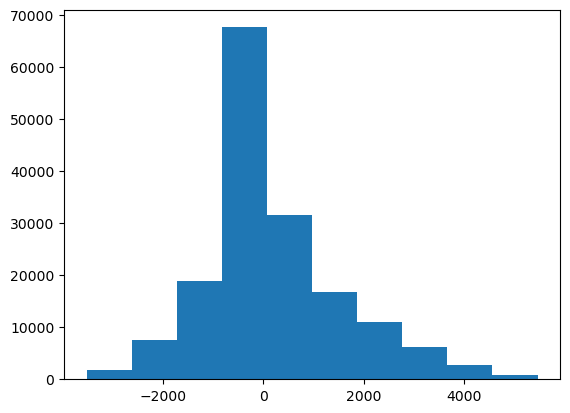

In [42]:
plt.hist(df_merged["date_diff"])

In [44]:
df_1y = df_merged.loc[df_merged["date_diff"]<=30]
df_1y = df_merged.loc[df_merged["date_diff"]>=-30]
df_1y

,fname,AlsUnitNo,AcqDate,연구내원번호,sex,BirthDate,처방시나이,TrueAge,waveform_shape,ABPM_Date,...,Hb,Cr,eGFR_MDRD,eGFR_CKDEPI,height,weight,BMI,EF,LVMI,date_diff
0,10000150_20200531_1724.csv,10000150.0,2020-05-31,121060244.0,F,1952-06-01,67.0,67.0,"(5000, 12)",2020-06-05,...,12.0,0.57,105.5,95.2,150.0,64.0,28.4,64.0,84.0,5
2,10001180_20200601_2306.csv,10001180.0,2020-06-01,121081037.0,M,1945-09-01,74.0,74.0,"(5000, 12)",2020-06-10,...,13.5,0.88,84.5,84.2,162.0,62.7,23.9,67.0,125.0,9
3,10001180_20200604_1410.csv,10001180.0,2020-06-04,121081037.0,M,1945-09-01,74.0,74.0,"(5000, 12)",2020-06-10,...,13.5,0.88,84.5,84.2,162.0,62.7,23.9,67.0,125.0,6
4,10001180_20200606_0832.csv,10001180.0,2020-06-06,121081037.0,M,1945-09-01,74.0,74.0,"(5000, 12)",2020-06-10,...,13.5,0.88,84.5,84.2,162.0,62.7,23.9,67.0,125.0,4
5,10001180_20200608_0712.csv,10001180.0,2020-06-08,121081037.0,M,1945-09-01,74.0,74.0,"(5000, 12)",2020-06-10,...,13.5,0.88,84.5,84.2,162.0,62.7,23.9,67.0,125.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164847,9998216_20200530_1043.csv,9998216.0,2020-05-30,121003629.0,F,1941-09-01,78.0,78.0,"(5000, 12)",2020-06-03,...,11.3,0.83,66.4,67.2,164.0,65.0,24.2,45.0,157.0,4
164849,999837_20180628_0949.csv,999837.0,2018-06-28,66497712.0,M,1972-09-01,45.0,45.0,"(5000, 12)",2018-07-28,...,15.9,0.75,112.2,110.1,185.0,87.0,25.4,64.0,92.0,30
164850,9999365_20200529_2211.csv,9999365.0,2020-05-29,121046162.0,M,1950-02-01,70.0,70.0,"(5000, 12)",2020-06-03,...,14.1,1.17,61.6,62.6,164.0,83.8,31.2,67.0,93.0,5
164851,9999365_20200530_0725.csv,9999365.0,2020-05-30,121046162.0,M,1950-02-01,70.0,70.0,"(5000, 12)",2020-06-03,...,14.1,1.17,61.6,62.6,164.0,83.8,31.2,67.0,93.0,4


In [45]:
df_1y["AlsUnitNo"].value_counts()

3809636.0     256
4321909.0     203
2943602.0     196
4479084.0     194
2851229.0     190
             ... 
4302591.0       1
2568724.0       1
4302902.0       1
4303103.0       1
10000150.0      1
Name: AlsUnitNo, Length: 12792, dtype: int64

In [47]:
df_1y.to_csv("/Users/younyung.gene/__TEXTBOOKS__/__3-2__/JUNIOR/patient_count/merged_30days.csv", index = False)

In [48]:
df_ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761137 entries, 0 to 3761136
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   fname           object 
 1   AlsUnitNo       float64
 2   AcqDate         object 
 3   연구내원번호          int64  
 4   sex             object 
 5   BirthDate       object 
 6   처방시나이           int64  
 7   TrueAge         int64  
 8   waveform_shape  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 258.3+ MB


In [49]:
df_ecg["AlsUnitNo"].value_counts()

4902204.0    436
3898814.0    392
2321684.0    378
2103305.0    370
4509936.0    363
            ... 
3097730.0      1
3097728.0      1
3097714.0      1
3097690.0      1
9999994.0      1
Name: AlsUnitNo, Length: 855935, dtype: int64